In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
import numpy as np
import pandas as pd
import csv

Explore data

In [95]:
digits_train = pd.read_csv(
    "train.csv")

x_train = digits_train.copy()
print(x_train.shape)
y_train = x_train.pop('label')
print(x_train.shape)
print(y_train.shape)

x_val, y_val = x_train[-2100:], y_train[-2100:]
x_train, y_train = x_train[:-2100], y_train[:-2100]

x_val = x_val / 255.
x_train = x_train / 255.
print(x_train.shape)
print(x_val.shape)

(42000, 785)
(42000, 784)
(42000,)
(39900, 784)
(2100, 784)


In [85]:

print(x_train.shape)
print(y_train.shape)



(39900, 784)
(39900,)


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Explore digits in matplot

1
0
1
4
0


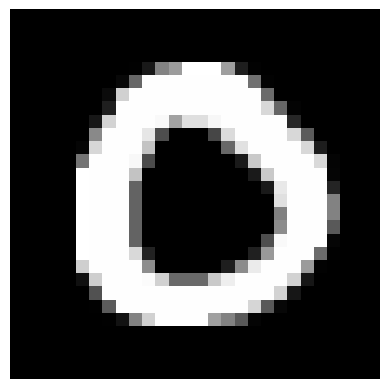

In [79]:
for i in range(5):
  print(y_train.iloc[i])
  reshape = pd.DataFrame(x_train.iloc[i].values.reshape(28, 28))
  plt.imshow(reshape, cmap='gray')
  plt.axis('off')
plt.show()

Build NN

In [96]:

model = Sequential([
tf.keras.layers.Input(shape=[784]),
Dense(1000, activation="relu"),
Dense(1000, activation="relu"),
Dense(10, activation="softmax")])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1000)              785000    
                                                                 
 dense_40 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_41 (Dense)            (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

In [98]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1247/1247 [==============================] - 22s 17ms/step - loss: 0.2833 - accuracy: 0.9153 - val_loss: 0.1728 - val_accuracy: 0.9495
Epoch 2/30
1247/1247 [==============================] - 22s 17ms/step - loss: 0.1118 - accuracy: 0.9660 - val_loss: 0.1367 - val_accuracy: 0.9600
Epoch 3/30
1247/1247 [==============================] - 22s 18ms/step - loss: 0.0718 - accuracy: 0.9785 - val_loss: 0.0978 - val_accuracy: 0.9690
Epoch 4/30
1247/1247 [==============================] - 24s 20ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.1069 - val_accuracy: 0.9686
Epoch 5/30
1247/1247 [==============================] - 22s 17ms/step - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0799 - val_accuracy: 0.9752
Epoch 6/30
1247/1247 [==============================] - 23s 18ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 0.0907 - val_accuracy: 0.9743
Epoch 7/30
1247/1247 [==============================] - 21s 16ms/step - loss: 0.0168 - accuracy: 0.9958 - val_loss: 0.0957 -

Predictions for test data

In [99]:
x_test = pd.read_csv("test.csv")

print(x_test.shape)

y_test = model.predict(x_test)

y_pred = y_test.argmax(axis=-1)



(28000, 784)
875/875 [==============================] - 5s 6ms/step


In [100]:
y_pred[:10]
y_test[:10]

array([[0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.99999994, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99999994, 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

Store to CSV

In [101]:
with open('predictions.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId','Label'])
    for i in range(y_pred.size):
        writer.writerow([i + 1, y_pred[i]])